# SOCIAL NETWORK ANALYSIS

In this notebook I'll be working on social network analysis using popular karate club dataset. This dataset contains people in the karate club, who later got split into two groups:
one around Mr Hi (original teacher) and John A (teacher assistant). Through this notebook I will assess network metrics such as density, degree, closeness centrality, etc. 
Eventually based on the analysis of social connections, I will build two communities from existing one.

В это ноутбуке я буду работать над анализом социальных взаимосвязей при использовании популярного датасета про клуб каратэ. Датасет содержит людей и связи между ними, которые ходили в карате клуб.
Этот карате клуб позднее разделился между мистером Хи (учителем) и Джоном А (помощником учителя). В этом ноутбуке я оценю показатели социальной сети, такие как density, degree, closeness centrality, т.д.
В итоге на основании анализа социальной сети, я построю граф с двумя коммьюнити.

Import modules

Импорт модулей

In [3]:
import networkx as nx 
import matplotlib.pyplot as plt
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

%matplotlib inline

Networkx has karate club network as a function, so we do not need to upload dataset.

Networkx имеет соцсеть карате клуба в качестве функции, так что нам не надо скачивать датасет.

In [4]:
ZKC_graph = nx.karate_club_graph()

{10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer'}


Let's assign integers to keep track of Mr Hi and John A nodes.

Назначим цифры, чтобы следить за нодами мистера Хи и Джона А.

In [ ]:
Mr_Hi = 0
John_A = 33

Let's now see which of two new clubs each member joined eventually. 

Выведем лейблы нодов, чтобы посмотреть в какие клубы в итоге распределились люди.

In [ ]:
club_labels = nx.get_node_attributes(ZKC_graph,'club')

print({key:club_labels[key] for key in range(10,16)})

This shows that nodes are indeed split between Mr Hi and Officer John A.
As a note, ZKC graph both undirected and unweighted. This means that the edges in the graph 
have no associated direction and that the edges take a binary value of either 1 or 0 (i.e. the members either have a relationship outside of the karate club or not).
Let's visualize our karate club and their relationship to each other.

Код выше показывает, что ноды действительно распределились между мистером Хи и Джоном А ('Officer'). 
Дополнительно, ZRC граф неориентированный и без весов. Это означает, что граф не имеет направлений взаимоотношений между нодами, а также его края принимают значений 1/0 (ноды либо имеют 
взаимоотношения все карате клуба, либо нет).
Давайте визуализируем карате клуб.

To plot using networkx we first need to get the positions we want for each node. For this dataset I will use circular layout.

Для визуализации датасета, сперва надо получить позиции, которые мы хотим для каждого нода. В данном ноутбуке я буду использовать круговое расположение для наглядности.

Let's hightlight Mr Hi and Officer John A.

Выделим цветом мистера Хи и Джона А.

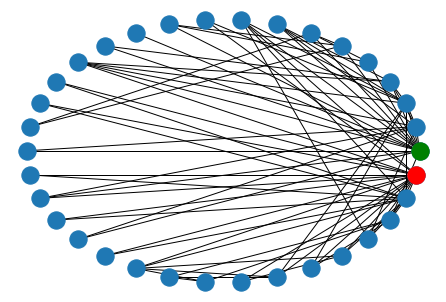

In [6]:
circ_pos = nx.circular_layout(ZKC_graph) 

nx.draw(ZKC_graph,circ_pos)

nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=[Mr_Hi], node_color='g', alpha=1)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=[John_A], node_color='r', alpha=1)

We quickly can see which members of the club are connected to eachother and we might even be able to draw a couple of quick initial conclusions.
The first thing to note is that both Mr Hi and John A have the most connections in the graph (in other words they are the most central nodes). This is to be expected for the instructor and 
officer of the group. Given that we can see some nodes are connected to only one of Mr Hi or John A (but not the other) we could also start to make some educated guesses at which members 
will join each faction.

На графике сразу видно, какие участники клуба связаны друг с другом.
Видно, что мистер Хи и Джон А имеют взаимосвязи с наибольшим количеством нодов (они наиболее центральные ноды). Это ожидаемо для руководителя группы и его помощника. 
Учитывая, что некоторые ноды связаны только с одним из цветных нодов, можно предположить кто из учеников окажется в какой группе. 

Before we dive into some community detection it is worth exploring the network we have in a bit more detail.
The first statistic I will look at is the density. This is a measure of how complete the graph is (how many edges are present in the network as compared to the total possible number of edges).

Прежде чем пытаться определить новые коммьюнити в оригинальном, проведем небольшой исследовательский анализ нашего графа.
Для начала посмотрим на плотность графа. Этот показатель отвечает за то, насколько граф полон: сколько взаимосвязей присутствует в сравнении с максимальным количеством возможных взаимосвязей.

In [9]:
density = nx.density(ZKC_graph)

print('The edge density is: ' + str(density))

The edge density is: 0.13903743315508021


Value of 0.14 for a network seems to be normal.

Значение плотности 0.14 ожидаемое для соцсети.

Next, let's look at the degree (how many edges each node has). This is a common centrality measure, which gives an idea of how 'imporant' each node is in the network. 
The assumption is that nodes with the most edges are the most important/central as they are directly connected to lots of other nodes.

Далее, посмотрим на степень (сколько взаимосвязей имеет каждый нод). Это распространенная метрица централизованности графа, которая помогает определить насколько "важен" каждый нод.
Предполагается, что ноды с наибольшим количеством взаимосвязей наиболее важные/центральные, так как они напрямую связаны с множеством другим нодов.

In [16]:
#the degree function in networkx returns a DegreeView object capable of iterating through (node, degree) pairs
degree = ZKC_graph.degree()

nodes = []
degree_list = []

for (n,d) in degree:
    nodes.append(n)
    degree_list.append(d)

av_degree = sum(degree_list) / len(degree_list)
max_d = max(degree_list)
max_d_index = degree_list.index(max_d)

print('Node with max degree: ', max_d_index, 'with amount of nodes: ', max_d)
print('The average degree is ' + str(av_degree))

Node with max degree:  33 with amount of nodes:  17
The average degree is 4.588235294117647


As we remember, node 33 is node of John A. It proves that this node is very important in the network, since it has a lot of connections.
On average nodes have around 5 connections.

Нод 33 - нод Джона А, помощника учителя. Учитывая, что этот нод имеет высокую важность в соцсети, неудивительно, что карате клуб в итоге разделился между ним и мистером Хи.
В среднем, каждый нод имеет примерно 5 взаимосвязей.

Let's plot the node amount distribution.

Нарисуем гистограмму распределения количества нодов.

Text(0.5, 1.0, 'Karate Club: Node Degree')

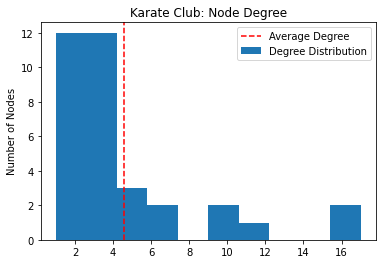

In [24]:
plt.hist(degree_list,label='Degree Distribution')
plt.axvline(av_degree,color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Karate Club: Node Degree')

The majority of members of the club do not have very many links (most have 2 or 3 links) but a few nodes (which here correspond to John A and Mr Hi) have a lot of links.

Большинство нодов не имеет много взаимосвязей (примерно 2-3), некоторые ноды (в частности Джон А и мистер Хи) имеют 16-17 взаимосвязей.

Another interesting statistic is the local clustering coefficient. The local clustering coefficient can be thought of as the average probability that
a pair of node i’s friends are also friends with each other. In other words, it measures the extent to which any given node is located within a tight 'cluster' of neighbouring nodes.

Еще одна статистика, на которую стоит посмотреть это коэффициент кластеризации. Коэффициент кластеризации отражает вероятность того, что пара нодов, связанных с нодом i, так же связаны между собой.
Другими словами, метрика измеряет насколько каждый нод в "кластере" соседских нодов.

Compute clustering coefficient

Считаем коэффициент кластеризации.

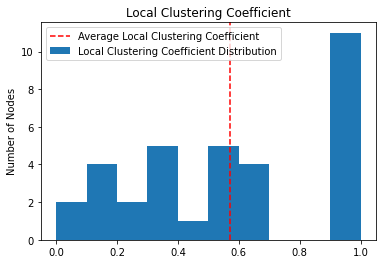

In [26]:
local_clustering_coefficient = nx.algorithms.cluster.clustering(ZKC_graph)

av_local_clustering_coefficient = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)

plt.hist(local_clustering_coefficient.values(),label='Local Clustering Coefficient Distribution')
plt.axvline(av_local_clustering_coefficient,color='r',linestyle='dashed',label='Average Local Clustering Coefficient')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Local Clustering Coefficient')
plt.show()

With average local clustering coefficient between 0.5-0.6, I would say network is distributed fine: not too dense with connection and without holes as well.

При коэффициента кластеризации между 0.5-0.6, я бы сказала, что взаимосвязи в соцсети распределены хорошо: соцсеть не слишком плотная (с множеством взаимосвязей), но и без откровенных провалов.

Now we can get onto community detection. For this I'm going to use networkx algorithms

Теперь можно перейти к поиску коммьюнити внутри соцсети при помощи networkx алгоритмов

In [ ]:
c = list(greedy_modularity_communities(ZKC_graph))

Let's find out how many communities we detected

Посмотрим, сколько коммьюнити смог найти алгоритм

In [ ]:
print(len(c))

Let's look closer at the communities

Посмотрим поближе на распределение нодов по коммьюнити

In [30]:
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])

print(community_0)
print(community_1)
print(community_2)

[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3, 7, 9, 12, 13, 17, 21]
[0, 4, 5, 6, 10, 11, 16, 19]


From these lists, we can see that Mr. Hi (node 0) and John A (node 33) are in different communities. 
This is expected, since we know that this eventually happened, but it is good to have it confirm.

Сразу видно, что мистер Хи (нод 0) и Джон А (нод 33) отнесены к разным коммьюнити.
Это ожидаемо, учитывая, что мы знаем, что карате клуб распадется между ними двумя, но хорошо иметь подверждение.

Let's plot communities with different colors

Нарисуем граф и отметим разные коммьюнити разными цветами.

Let's plot communities with different colors

Нарисуем граф и отметим разные коммьюнити разными цветами.

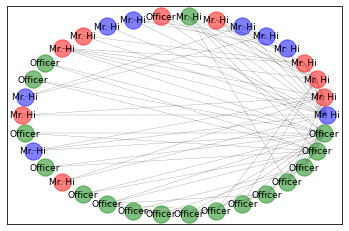

In [33]:
nx.draw_networkx_nodes(ZKC_graph,circ_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph,circ_pos, nodelist=community_1, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph,circ_pos, nodelist=community_2, node_color='b', alpha=0.5)
nx.draw_networkx_edges(ZKC_graph,circ_pos,style='dashed',width = 0.2)

nx.draw_networkx_labels(ZKC_graph,circ_pos,club_labels,font_size=9)

plt.show()

From this we can see that most of community 1 also went with Mr Hi (besides 1 node). Let's merge communities 1 and 2 and plot graph again.

Из этого графа видно, что в коммьюнити 1 все кроме 1 нода остались с мистером Хи. Соединим коммьюнити 1 и 2 и построим граф снова.

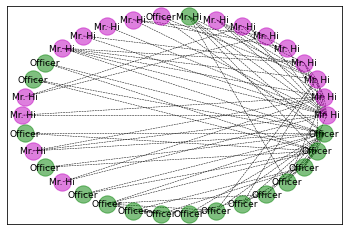

In [36]:
combined_community = community_1 + community_2

nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph, circ_pos, nodelist=combined_community, node_color='m', alpha=0.5)

nx.draw_networkx_edges(ZKC_graph, circ_pos,style='dashed',width = 0.5)

nx.draw_networkx_labels(ZKC_graph, circ_pos, club_labels, font_size=9)

plt.show()

So, following the combination of those two communities we have split our network into two groups - 
the green group we predict to join John A's faction and the purple group Mr Hi's.
Comparing to the club labels we see only one incorrect prediction in each group, meaning we have an accuracy of ~94%. 

Последний граф показывает распределение людей по двум коммьюнити - между мистером Хи (фиолетовые ноды) и Джоном А (зеленые ноды).
Если посмотреть на лейблы нодов, то можно увидеть, что алгоритмом было допущено две ошибки (по одной на группу), а значит точность алгоритма примерно 94%.